# Analyzing Online Habits in Youtube & Youtube Music

#### Debapratim 

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD

### Part 1: Analyzing from Youtube Subscriptions

In [2]:
#Reading the data
with open('subscriptions.json',mode='r',encoding='utf-8-sig') as hist:
    wlist = json.load(hist)

In [3]:
len(wlist)

14

In [4]:
wlist[0]

{'contentDetails': {'activityType': 'all',
  'newItemCount': 0,
  'totalItemCount': 13},
 'etag': 'izgh1hN4yW_d4PmhjbuN_qUO0fQ',
 'id': 'TUMYVmGpSYNTgbk8m3I0Ywuvtm8tXKLJ-T0hDcscN8g',
 'kind': 'youtube#subscription',
 'snippet': {'channelId': 'UCSg8TInubrRamEFDedjDPQQ',
  'description': 'Academic',
  'publishedAt': '2020-04-01T08:07:37.804Z',
  'resourceId': {'channelId': 'UCfKnwTRbzbYe_8kONKZynfg',
   'kind': 'youtube#channel'},
  'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AAUvwnh-JudoBGN7bJpP7gAR8gia4GCD2jMQcx7Ofccyho0=s88-c-k-c0x00ffffff-no-rj'},
   'high': {'url': 'https://yt3.ggpht.com/ytc/AAUvwnh-JudoBGN7bJpP7gAR8gia4GCD2jMQcx7Ofccyho0=s800-c-k-c0x00ffffff-no-rj'},
   'medium': {'url': 'https://yt3.ggpht.com/ytc/AAUvwnh-JudoBGN7bJpP7gAR8gia4GCD2jMQcx7Ofccyho0=s240-c-k-c0x00ffffff-no-rj'}},
  'title': 'Dr. K S Kuppu Samy'}}

In [5]:
titles = [l['snippet']['title'] for l in wlist]
descriptions = [l['snippet']['description'] for l in wlist]

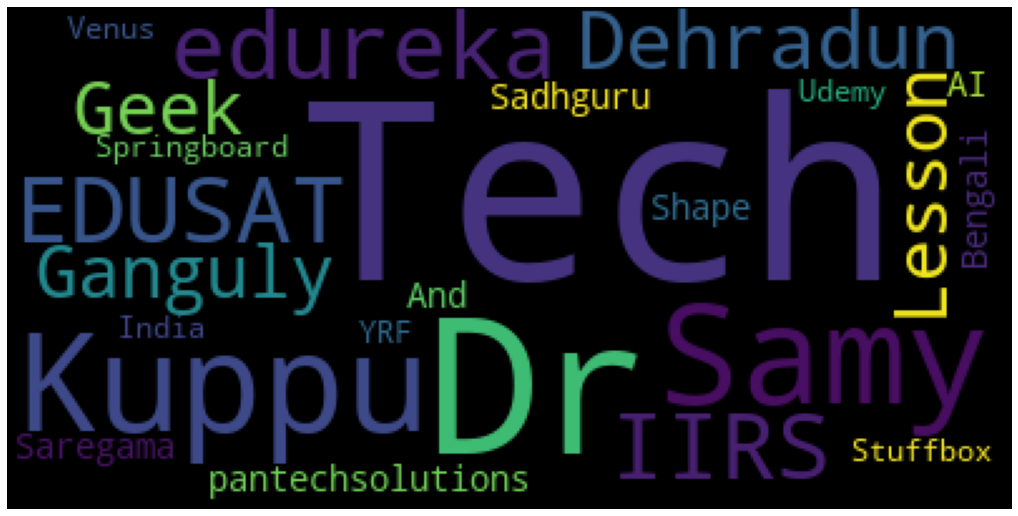

In [6]:
wc= WordCloud().generate(" ".join(titles))
plt.figure(figsize=(18,12))
plt.imshow(wc)
_ = plt.axis('off')

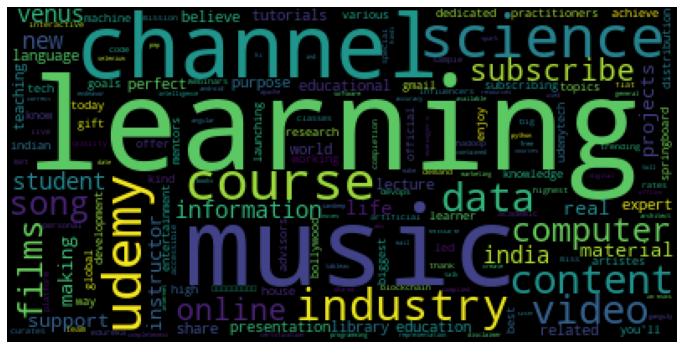

In [7]:
stopwords=['www','http','facebook','twitter','instagram','bit','ly','watchmojo','https','youtube',
           'goo','gl','watch','suggest','com']
stopwords+=list(ENGLISH_STOP_WORDS)
desc = " ".join(descriptions).lower()

wc = WordCloud(stopwords=stopwords,normalize_plurals=True).generate(desc)
plt.figure(figsize=(12,12))
plt.imshow(wc)
_ = plt.axis('off')

## Topic Modelling

In [8]:
vect = TfidfVectorizer(stop_words=stopwords)

In [9]:
X=vect.fit_transform(descriptions)

In [10]:
X.shape

(14, 389)

### Latent Semantic Analysis

In [11]:
U, S, V = svd(X.todense(),full_matrices=False)

In [12]:
vocab = vect.get_feature_names()

#n_words represent no. of top words
def show_topics(a,n_words=5):
    top_words = lambda t:[vocab[i] for i in np.argsort(t)[:-n_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [" ".join(t) for t in topic_words]

In [13]:
show_topics(V[:10])

['academic 30000 2oxkpmf hqbzyojxkny feelings',
 'music films perfect songs venus',
 'computer music related gmail perfect',
 'stuffbox cool business facts website',
 'academic 𝐘𝐎𝐔𝐓𝐔𝐁𝐄𝟐𝟎 facts evergreen excited',
 'udemy learning courses teaching new',
 'computer enjoy related films sandeep',
 'perfect music venus songs india',
 'udemy teaching new tech development',
 'songs venus bollywood official udemy']

In [14]:
tsvd = TruncatedSVD(n_components=2)
x_red = tsvd.fit_transform(X.todense())

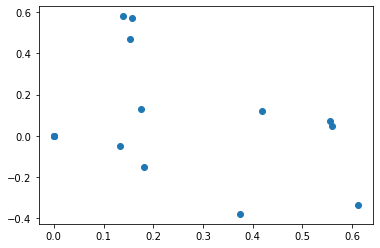

In [15]:
plt.scatter(*x_red.T)
plt.show()

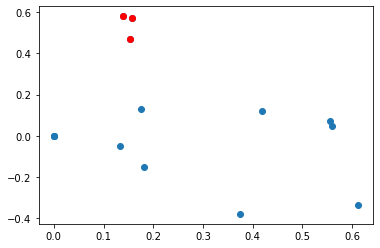

In [16]:
outliers = np.arange(x_red.shape[0])[x_red[:,1] > 0.4]
plt.scatter(*x_red.T)
plt.scatter(*x_red[outliers,:].T,c="r")
plt.show()

In [17]:
outliers

array([ 7, 12, 13])

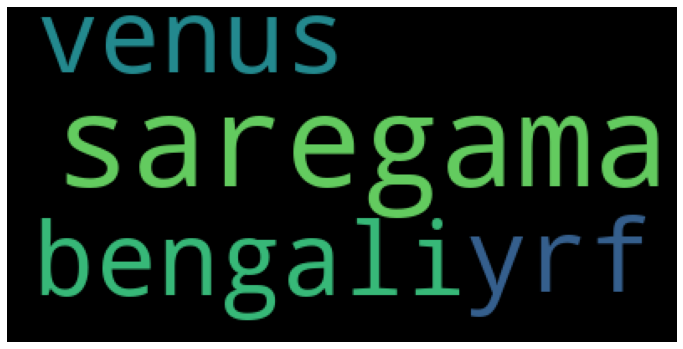

In [18]:
outliers = [titles[i] for i in outliers]

wc = WordCloud(stopwords=stopwords,normalize_plurals=True).generate(" ".join(outliers).lower())
plt.figure(figsize=(12,12))
plt.imshow(wc)
_ = plt.axis('off')

### Part 2: Analyzing from Youtube watched videos

In [19]:
#Reading the data
with open('watch-history.json',mode='r',encoding='utf-8-sig') as history:
    watch_list = json.load(history)

In [20]:
watch_list[0]

{'header': 'YouTube',
 'title': 'Watched Should I put Hobbies on my Resume? And How? | Make Yourself standout in Interview',
 'titleUrl': 'https://www.youtube.com/watch?v=S5mmEYlUOyM',
 'subtitles': [{'name': 'Ayushi Rawat',
   'url': 'https://www.youtube.com/channel/UCvmONGrUQxL3B3PmSv1JQqQ'}],
 'time': '2021-06-23T22:29:19.994Z',
 'products': ['YouTube']}

In [21]:
wt_list = watch_list[:100]
len(wt_list)

100

In [22]:
title_list = [tt['title'] for tt in wt_list]

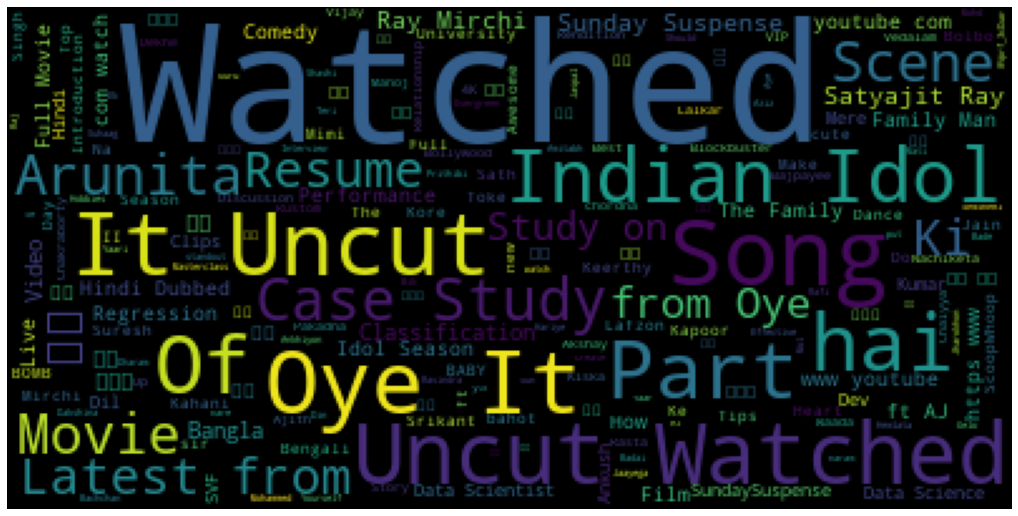

In [23]:
wc2= WordCloud().generate(" ".join(title_list))
plt.figure(figsize=(18,12))
plt.imshow(wc2)
_ = plt.axis('off')

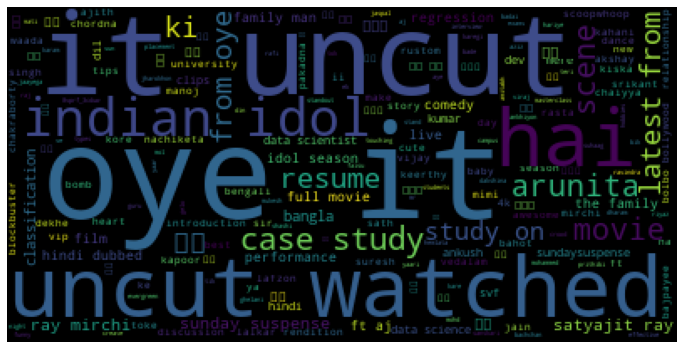

In [24]:
stopwords=['www','http','facebook','twitter','instagram','bit','ly','watchmojo','https','youtube',
           'goo','gl','watch','suggest','com','watched','https','video','song','removed']
stopwords+=list(ENGLISH_STOP_WORDS)
tt2 = " ".join(title_list).lower()

wc3 = WordCloud(stopwords=stopwords,normalize_plurals=True).generate(tt2)
plt.figure(figsize=(12,12))
plt.imshow(wc3)
_ = plt.axis('off')

### Topic Modelling

In [25]:
vect2 = TfidfVectorizer(stop_words=stopwords)

In [26]:
Y=vect2.fit_transform(title_list)

In [27]:
Y.shape

(100, 488)

### Latent Semantic Analysis

In [28]:
u, s, v = svd(Y.todense(),full_matrices=False)

In [29]:
vocab2 = vect2.get_feature_names()

#n_words represent no. of top words
def display_topics(a,n_words=3):
    top_words2 = lambda t:[vocab2[i] for i in np.argsort(t)[:-n_words-1:-1]]
    topic_words2 = ([top_words2(t) for t in a])
    return [" ".join(t) for t in topic_words2]

In [30]:
display_topics(v[:10])

['case study classification',
 'mirchi satyajit ray',
 'mirchi ray satyajit',
 'data resume scientist',
 'indian idol arunita',
 'एक उथ धन',
 'suspense sunday indian',
 'family man clips',
 'sunday suspense hindi',
 'suspense sunday ki']

In [31]:
tsvd2 = TruncatedSVD(n_components=2)
x_red = tsvd2.fit_transform(Y.todense())

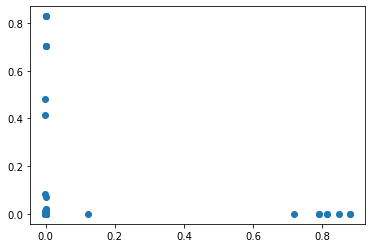

In [32]:
plt.scatter(*x_red.T)
plt.show()

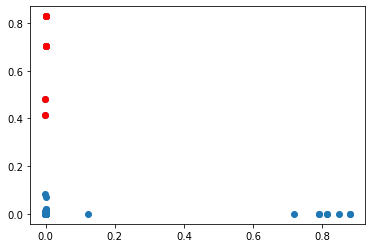

In [33]:
outliers2 = np.arange(x_red.shape[0])[x_red[:,1] > 0.4]
plt.scatter(*x_red.T)
plt.scatter(*x_red[outliers2,:].T,c="r")
plt.show()

In [34]:
outliers2

array([33, 34, 35, 36, 37, 38, 39, 40])

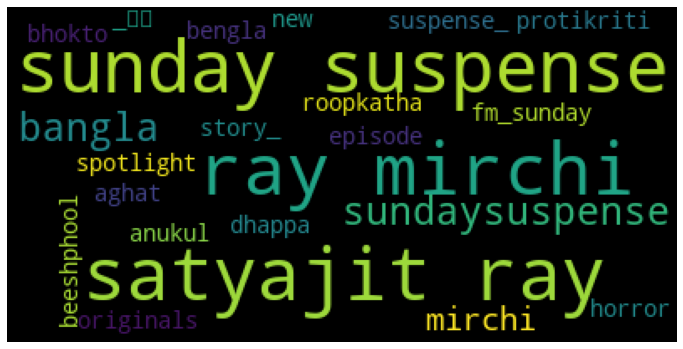

In [35]:
outliers2 = [title_list[i] for i in outliers2]

wc4 = WordCloud(stopwords=stopwords,normalize_plurals=True).generate(" ".join(outliers2).lower())
plt.figure(figsize=(12,12))
plt.imshow(wc4)
_ = plt.axis('off')

In [36]:
not_outliers = set(title_list) - set(outliers2)
not_out = list(not_outliers)

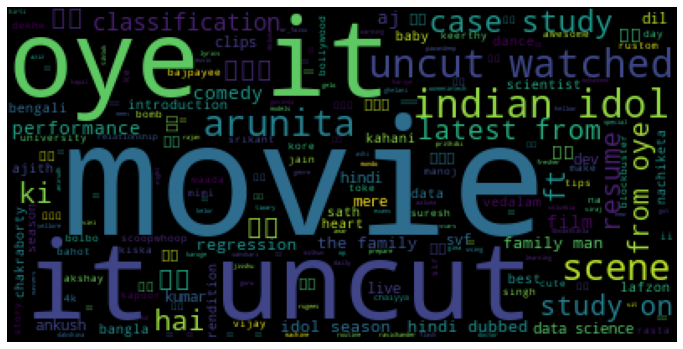

In [37]:
wc5 = WordCloud(stopwords=stopwords,normalize_plurals=True).generate(" ".join(not_out).lower())
plt.figure(figsize=(12,12))
plt.imshow(wc5)
_ = plt.axis('off')

In [58]:
!pipreqs --encoding UTF8